# TTT4275 Classification Project: Music Genre Classification

Imports:

In [161]:
import os
os.environ["OMP_NUM_THREADS"] = '4'
from sklearn.mixture import GaussianMixture
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_5s = pd.read_csv('Classification music/GenreClassData_5s.txt', sep='\t')
data_10s = pd.read_csv('Classification music/GenreClassData_10s.txt', sep='\t')
data_30s = pd.read_csv('Classification music/GenreClassData_30s.txt', sep='\t')

# Calculate error rate
def error_rate(y_test, y_pred):
    return np.sum(y_test != y_pred) / len(y_test)

# Calculate confusion matrix
def confusion_matrix(y_test, y_pred, classes):
    # Make confusion matrix
    n_classes = len(classes)
    class_to_index = {cls: i for i, cls in enumerate(classes)}
    
    # Initialize confusion matrix with zeros
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    # Fill confusion matrix
    for true_label, pred_label in zip(y_test, y_pred):
        true_index = class_to_index[true_label]
        pred_index = class_to_index[pred_label]
        cm[true_index, pred_index] += 1

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.show()


## Task 1

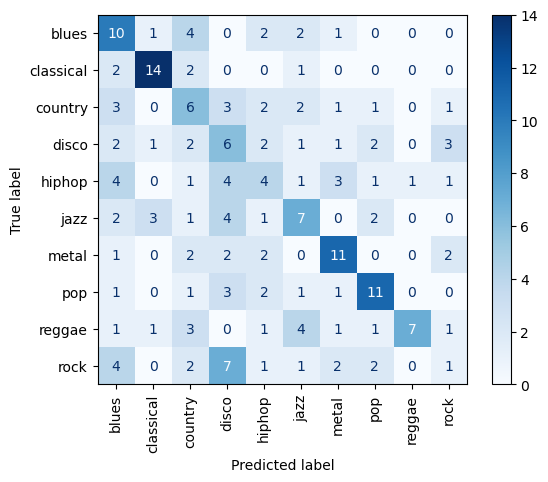

Error rate: 0.611


In [162]:
selected_features = data_30s[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo']]
y_train = training_data['Genre']

X_test = test_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate: {:.3f}'.format(error))

## Task 2

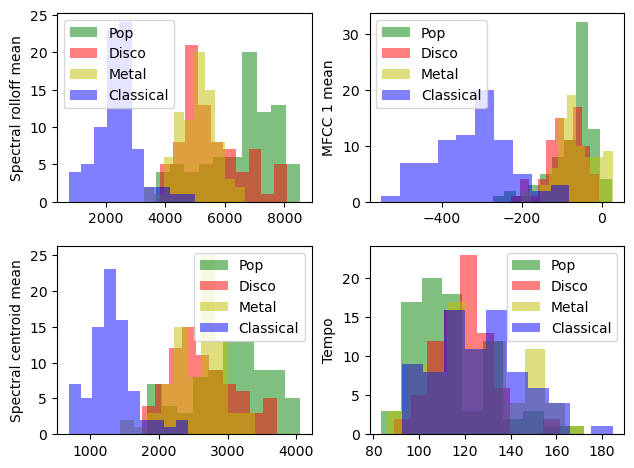

In [163]:
# Separate features into genres
features_pop = training_data[training_data['Genre'] == 'pop']
features_disco = training_data[training_data['Genre'] == 'disco']
features_metal = training_data[training_data['Genre'] == 'metal']
features_classical = training_data[training_data['Genre'] == 'classical']

# Plot histograms
kwargs = dict(alpha=0.5, bins=10)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()

ax0.hist(features_pop['spectral_rolloff_mean'], **kwargs, color='g', label='Pop')
ax0.hist(features_disco['spectral_rolloff_mean'], **kwargs, color='r', label='Disco')
ax0.hist(features_metal['spectral_rolloff_mean'], **kwargs, color='y', label='Metal')
ax0.hist(features_classical['spectral_rolloff_mean'], **kwargs, color='b', label='Classical')
ax0.set_ylabel('Spectral rolloff mean')
ax0.legend();

ax1.hist(features_pop['mfcc_1_mean'], **kwargs, color='g', label='Pop')
ax1.hist(features_disco['mfcc_1_mean'], **kwargs, color='r', label='Disco')
ax1.hist(features_metal['mfcc_1_mean'], **kwargs, color='y', label='Metal')
ax1.hist(features_classical['mfcc_1_mean'], **kwargs, color='b', label='Classical')
ax1.set_ylabel('MFCC 1 mean')
ax1.legend();

ax2.hist(features_pop['spectral_centroid_mean'], **kwargs, color='g', label='Pop')
ax2.hist(features_disco['spectral_centroid_mean'], **kwargs, color='r', label='Disco')
ax2.hist(features_metal['spectral_centroid_mean'], **kwargs, color='y', label='Metal')
ax2.hist(features_classical['spectral_centroid_mean'], **kwargs, color='b', label='Classical')
ax2.set_ylabel('Spectral centroid mean')
ax2.legend();

ax3.hist(features_pop['tempo'], **kwargs, color='g', label='Pop')
ax3.hist(features_disco['tempo'], **kwargs, color='r', label='Disco')
ax3.hist(features_metal['tempo'], **kwargs, color='y', label='Metal')
ax3.hist(features_classical['tempo'], **kwargs, color='b', label='Classical')
ax3.set_ylabel('Tempo')
ax3.legend();

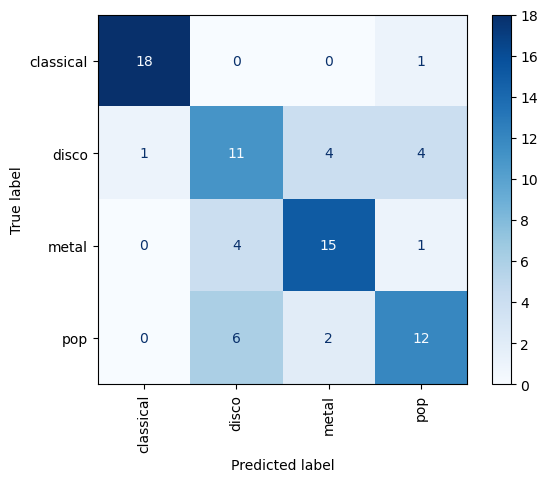

Error rate tempo removed: 0.291


In [164]:
# Define the list of desired genres
selected_genres = ['pop', 'disco', 'metal', 'classical']

# Filter rows based on the 'Genre' column
filtered_data = data_30s[data_30s['Genre'].isin(selected_genres)]

selected_features = filtered_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean']]
y_train = training_data['Genre']

X_test = test_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate tempo removed: {:.3f}'.format(error))

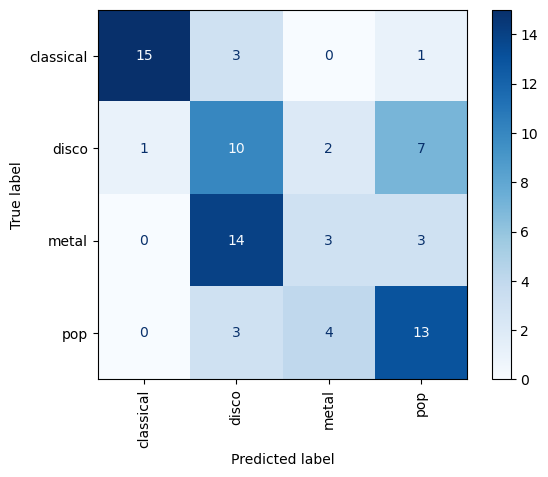

Error rate spectreal rolloff mean removed: 0.481


In [165]:
# Removing spectreal rolloff mean
# Define the list of desired genres
selected_genres = ['pop', 'disco', 'metal', 'classical']

# Filter rows based on the 'Genre' column
filtered_data = data_30s[data_30s['Genre'].isin(selected_genres)]

selected_features = filtered_data[['mfcc_1_mean', 'spectral_centroid_mean','tempo','Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['mfcc_1_mean', 'spectral_centroid_mean','tempo']]
y_train = training_data['Genre']

X_test = test_data[['mfcc_1_mean', 'spectral_centroid_mean','tempo']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate spectreal rolloff mean removed: {:.3f}'.format(error))

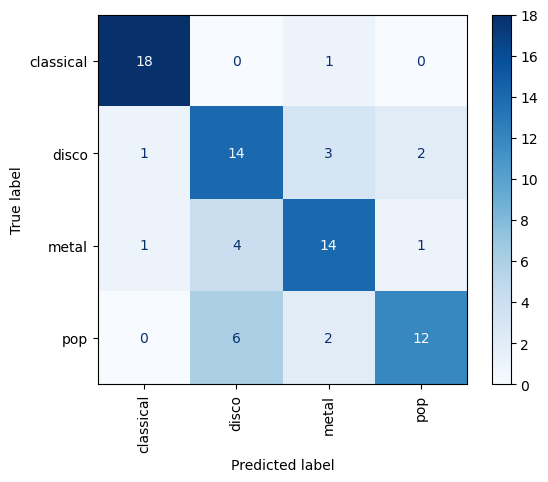

Error rate mfcc_1_mean removed: 0.266


In [166]:
# Removing mfcc_1_mean
# Define the list of desired genres
selected_genres = ['pop', 'disco', 'metal', 'classical']

# Filter rows based on the 'Genre' column
filtered_data = data_30s[data_30s['Genre'].isin(selected_genres)]

selected_features = filtered_data[['spectral_rolloff_mean', 'spectral_centroid_mean', 'tempo', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['spectral_rolloff_mean', 'spectral_centroid_mean', 'tempo']]
y_train = training_data['Genre']

X_test = test_data[['spectral_rolloff_mean', 'spectral_centroid_mean', 'tempo']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate mfcc_1_mean removed: {:.3f}'.format(error))

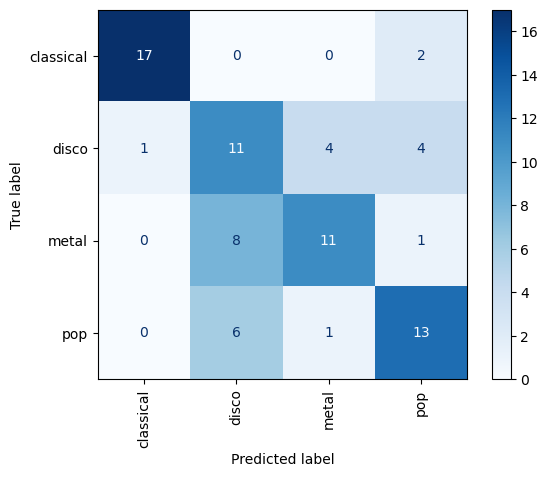

Error rate spectral_centroid_mean removed: 0.342


In [167]:
# Removing spectral_centroid_mean
# Define the list of desired genres
selected_genres = ['pop', 'disco', 'metal', 'classical']

# Filter rows based on the 'Genre' column
filtered_data = data_30s[data_30s['Genre'].isin(selected_genres)]

selected_features = filtered_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'tempo', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'tempo']]
y_train = training_data['Genre']

X_test = test_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'tempo']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate spectral_centroid_mean removed: {:.3f}'.format(error))

## Task 3

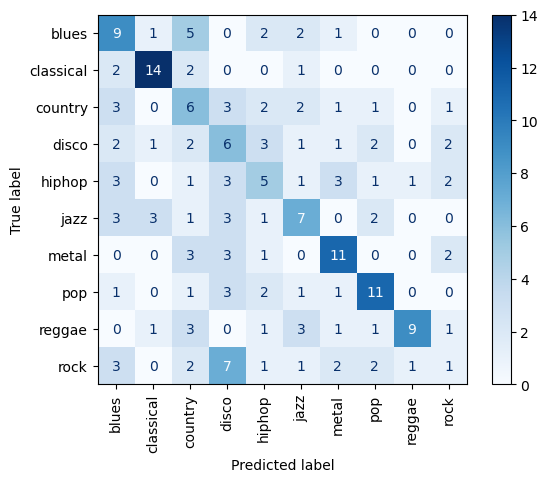

Error rate: 0.601


In [168]:
selected_features = data_30s[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean']]
y_train = training_data['Genre']

X_test = test_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate: {:.3f}'.format(error))

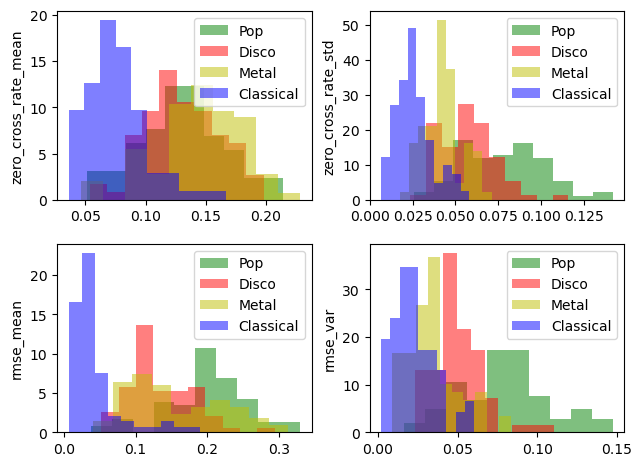

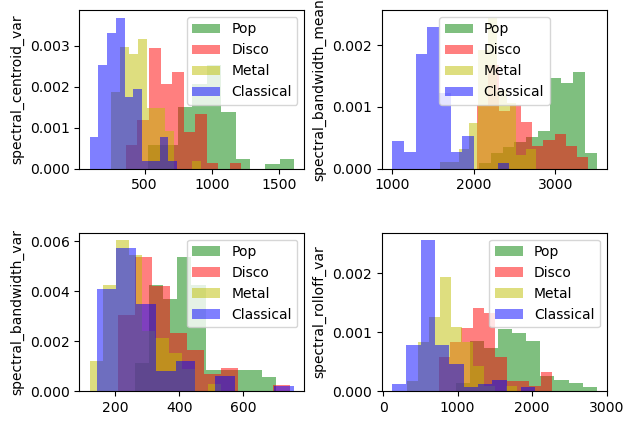

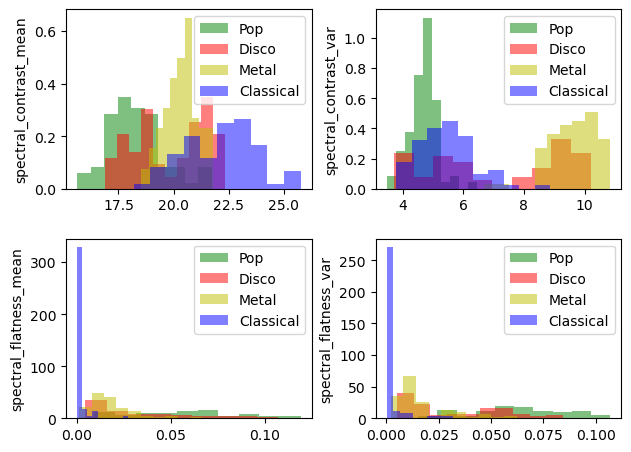

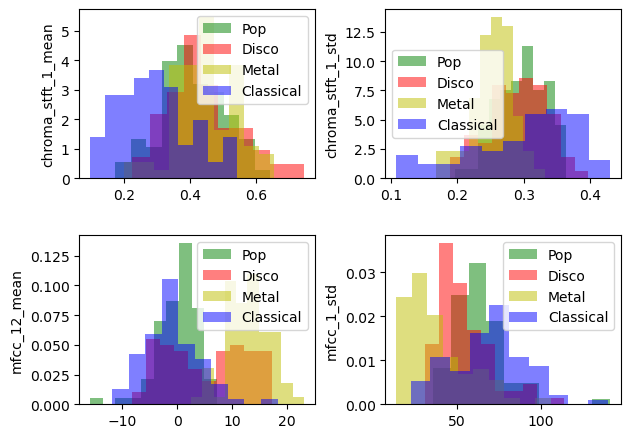

In [169]:
# Test some of the remaining features on pop, disco, metal and classical genres
# Set up 
unselected_features = data_30s[['zero_cross_rate_mean', 'zero_cross_rate_std', 'rmse_mean', 'rmse_var', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'spectral_rolloff_var', 'spectral_contrast_mean', 'spectral_contrast_var', 'spectral_flatness_mean', 'spectral_flatness_var', 'chroma_stft_1_mean', 'chroma_stft_1_std','mfcc_12_mean', 'mfcc_1_std', 'Genre', 'Type']]
unused_training_data = unselected_features[unselected_features['Type'] == 'Train']

# Separate features into genres
unused_features_pop = unused_training_data[unused_training_data['Genre'] == 'pop']
unused_features_disco = unused_training_data[unused_training_data['Genre'] == 'disco']
unused_features_metal = unused_training_data[unused_training_data['Genre'] == 'metal']
unused_features_classical = unused_training_data[unused_training_data['Genre'] == 'classical']

# Plot histograms
kwargs = {'alpha': 0.5, 'bins': 10, 'density': True, 'histtype': 'stepfilled'}
fig_2_0, ((ay0, ay1), (ay2, ay3)) = plt.subplots(nrows=2, ncols=2)
fig_2_0.tight_layout()
fig_2_1, ((ay4, ay5), (ay6, ay7)) = plt.subplots(nrows=2, ncols=2)
fig_2_1.tight_layout(pad=2.5)
fig_2_2, ((az0, az1), (az2, az3)) = plt.subplots(nrows=2, ncols=2)
fig_2_2.tight_layout(pad=1.5)
fig_2_3, ((az4, az5), (az6, az7)) = plt.subplots(nrows=2, ncols=2)
fig_2_3.tight_layout(pad=2)


ay0.hist(unused_features_pop['zero_cross_rate_mean'], **kwargs, color='g', label='Pop')
ay0.hist(unused_features_disco['zero_cross_rate_mean'], **kwargs, color='r', label='Disco')
ay0.hist(unused_features_metal['zero_cross_rate_mean'], **kwargs, color='y', label='Metal')
ay0.hist(unused_features_classical['zero_cross_rate_mean'], **kwargs, color='b', label='Classical')
ay0.set_ylabel('zero_cross_rate_mean')
ay0.legend();

ay1.hist(unused_features_pop['zero_cross_rate_std'], **kwargs, color='g', label='Pop')
ay1.hist(unused_features_disco['zero_cross_rate_std'], **kwargs, color='r', label='Disco')
ay1.hist(unused_features_metal['zero_cross_rate_std'], **kwargs, color='y', label='Metal')
ay1.hist(unused_features_classical['zero_cross_rate_std'], **kwargs, color='b', label='Classical')
ay1.set_ylabel('zero_cross_rate_std')
ay1.legend();

ay2.hist(unused_features_pop['rmse_mean'], **kwargs, color='g', label='Pop')
ay2.hist(unused_features_disco['rmse_mean'], **kwargs, color='r', label='Disco')
ay2.hist(unused_features_metal['rmse_mean'], **kwargs, color='y', label='Metal')
ay2.hist(unused_features_classical['rmse_mean'], **kwargs, color='b', label='Classical')
ay2.set_ylabel('rmse_mean')
ay2.legend();

ay3.hist(unused_features_pop['rmse_var'], **kwargs, color='g', label='Pop')
ay3.hist(unused_features_disco['rmse_var'], **kwargs, color='r', label='Disco')
ay3.hist(unused_features_metal['rmse_var'], **kwargs, color='y', label='Metal')
ay3.hist(unused_features_classical['rmse_var'], **kwargs, color='b', label='Classical')
ay3.set_ylabel('rmse_var')
ay3.legend();

ay4.hist(unused_features_pop['spectral_centroid_var'], **kwargs, color='g', label='Pop')
ay4.hist(unused_features_disco['spectral_centroid_var'], **kwargs, color='r', label='Disco')
ay4.hist(unused_features_metal['spectral_centroid_var'], **kwargs, color='y', label='Metal')
ay4.hist(unused_features_classical['spectral_centroid_var'], **kwargs, color='b', label='Classical')
ay4.set_ylabel('spectral_centroid_var')
ay4.legend();

ay5.hist(unused_features_pop['spectral_bandwidth_mean'], **kwargs, color='g', label='Pop')
ay5.hist(unused_features_disco['spectral_bandwidth_mean'], **kwargs, color='r', label='Disco')
ay5.hist(unused_features_metal['spectral_bandwidth_mean'], **kwargs, color='y', label='Metal')
ay5.hist(unused_features_classical['spectral_bandwidth_mean'], **kwargs, color='b', label='Classical')
ay5.set_ylabel('spectral_bandwidth_mean')
ay5.legend();

ay6.hist(unused_features_pop['spectral_bandwidth_var'], **kwargs, color='g', label='Pop')
ay6.hist(unused_features_disco['spectral_bandwidth_var'], **kwargs, color='r', label='Disco')
ay6.hist(unused_features_metal['spectral_bandwidth_var'], **kwargs, color='y', label='Metal')
ay6.hist(unused_features_classical['spectral_bandwidth_var'], **kwargs, color='b', label='Classical')
ay6.set_ylabel('spectral_bandwidth_var')
ay6.legend();

ay7.hist(unused_features_pop['spectral_rolloff_var'], **kwargs, color='g', label='Pop')
ay7.hist(unused_features_disco['spectral_rolloff_var'], **kwargs, color='r', label='Disco')
ay7.hist(unused_features_metal['spectral_rolloff_var'], **kwargs, color='y', label='Metal')
ay7.hist(unused_features_classical['spectral_rolloff_var'], **kwargs, color='b', label='Classical')
ay7.set_ylabel('spectral_rolloff_var')
ay7.legend();

az0.hist(unused_features_pop['spectral_contrast_mean'], **kwargs, color='g', label='Pop')
az0.hist(unused_features_disco['spectral_contrast_mean'], **kwargs, color='r', label='Disco')
az0.hist(unused_features_metal['spectral_contrast_mean'], **kwargs, color='y', label='Metal')
az0.hist(unused_features_classical['spectral_contrast_mean'], **kwargs, color='b', label='Classical')
az0.set_ylabel('spectral_contrast_mean')
az0.legend();

az1.hist(unused_features_pop['spectral_contrast_var'], **kwargs, color='g', label='Pop')
az1.hist(unused_features_disco['spectral_contrast_var'], **kwargs, color='r', label='Disco')
az1.hist(unused_features_metal['spectral_contrast_var'], **kwargs, color='y', label='Metal')
az1.hist(unused_features_classical['spectral_contrast_var'], **kwargs, color='b', label='Classical')
az1.set_ylabel('spectral_contrast_var')
az1.legend();

az2.hist(unused_features_pop['spectral_flatness_mean'], **kwargs, color='g', label='Pop')
az2.hist(unused_features_disco['spectral_flatness_mean'], **kwargs, color='r', label='Disco')
az2.hist(unused_features_metal['spectral_flatness_mean'], **kwargs, color='y', label='Metal')
az2.hist(unused_features_classical['spectral_flatness_mean'], **kwargs, color='b', label='Classical')
az2.set_ylabel('spectral_flatness_mean')
az2.legend();

az3.hist(unused_features_pop['spectral_flatness_var'], **kwargs, color='g', label='Pop')
az3.hist(unused_features_disco['spectral_flatness_var'], **kwargs, color='r', label='Disco')
az3.hist(unused_features_metal['spectral_flatness_var'], **kwargs, color='y', label='Metal')
az3.hist(unused_features_classical['spectral_flatness_var'], **kwargs, color='b', label='Classical')
az3.set_ylabel('spectral_flatness_var')
az3.legend();

az4.hist(unused_features_pop['chroma_stft_1_mean'], **kwargs, color='g', label='Pop')
az4.hist(unused_features_disco['chroma_stft_1_mean'], **kwargs, color='r', label='Disco')
az4.hist(unused_features_metal['chroma_stft_1_mean'], **kwargs, color='y', label='Metal')
az4.hist(unused_features_classical['chroma_stft_1_mean'], **kwargs, color='b', label='Classical')
az4.set_ylabel('chroma_stft_1_mean')
az4.legend();

az5.hist(unused_features_pop['chroma_stft_1_std'], **kwargs, color='g', label='Pop')
az5.hist(unused_features_disco['chroma_stft_1_std'], **kwargs, color='r', label='Disco')
az5.hist(unused_features_metal['chroma_stft_1_std'], **kwargs, color='y', label='Metal')
az5.hist(unused_features_classical['chroma_stft_1_std'], **kwargs, color='b', label='Classical')
az5.set_ylabel('chroma_stft_1_std')
az5.legend();

az6.hist(unused_features_pop['mfcc_12_mean'], **kwargs, color='g', label='Pop')
az6.hist(unused_features_disco['mfcc_12_mean'], **kwargs, color='r', label='Disco')
az6.hist(unused_features_metal['mfcc_12_mean'], **kwargs, color='y', label='Metal')
az6.hist(unused_features_classical['mfcc_12_mean'], **kwargs, color='b', label='Classical')
az6.set_ylabel('mfcc_12_mean')
az6.legend();

az7.hist(unused_features_pop['mfcc_1_std'], **kwargs, color='g', label='Pop')
az7.hist(unused_features_disco['mfcc_1_std'], **kwargs, color='r', label='Disco')
az7.hist(unused_features_metal['mfcc_1_std'], **kwargs, color='y', label='Metal')
az7.hist(unused_features_classical['mfcc_1_std'], **kwargs, color='b', label='Classical')
az7.set_ylabel('mfcc_1_std')
az7.legend();



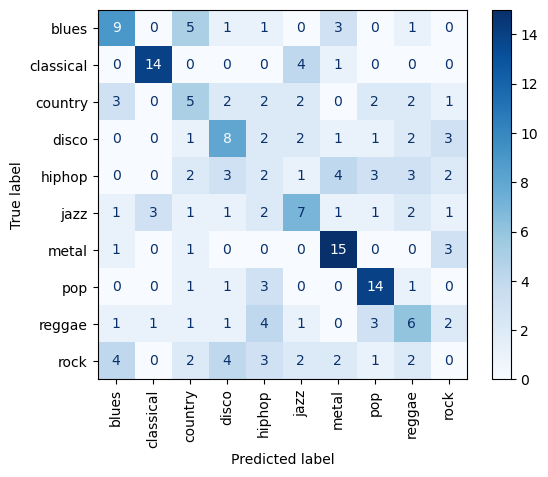

Error rate: 0.596


In [170]:
selected_features = data_30s[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'spectral_rolloff_var', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features and labels for both training and test datasets
X_train = training_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'spectral_rolloff_var']]
y_train = training_data['Genre']

X_test = test_data[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'spectral_rolloff_var']]
y_test = test_data['Genre']

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# kNN classifier
k = 5

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
classes = np.unique(y_train_NP)
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate: {:.3f}'.format(error))

## Task 4

Gaussian Mixture Model Classifier:

In [171]:
# Combine all data
combined_data = pd.concat([data_5s,data_10s, data_30s], ignore_index=True)

# Select all features except tempo
selected_features = combined_data.drop('tempo', axis=1)

# Separate features and labels for both training and test datasets
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

# Separate features into genres
X_train = training_data.drop(['Genre', 'Type','Track ID', 'File','GenreID'], axis=1)
y_train = training_data['Genre']

X_test = test_data.drop(['Genre', 'Type','Track ID', 'File','GenreID'], axis=1)
y_test = test_data['Genre']

# Identify unique class labels
classes = np.unique(y_train)

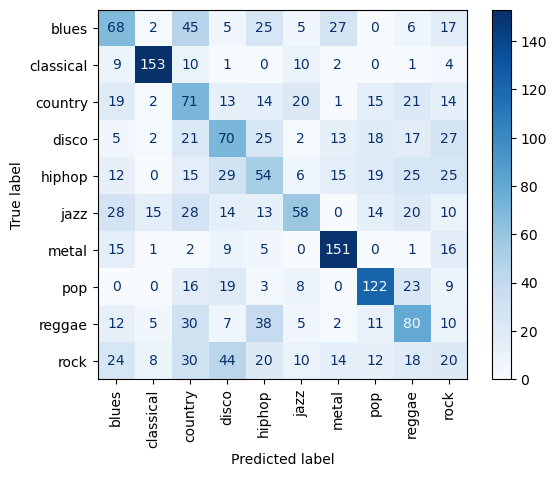

Error rate: 0.572


In [172]:
# kNN classifier
k = 5

# Convert datasets into numpy
X_train_NP = X_train.values
y_train_NP = y_train.values

X_test_NP = X_test.values
y_test_NP = y_test.values

# Compute vector of distances
distances = []
i = 0
while i < len(X_test_NP):
    distances.append(np.linalg.norm(X_train_NP - X_test_NP[i], axis=1))
    i = i+1

# Find kNN
k_nearest_neighbor_id = []
i = 0
while i < len(distances):
    k_nearest_neighbor_id.append(distances[i].argsort()[:k])
    i = i+1

# Connect values with genre
k_nearest_neighbor_genre = []
i = 0
while i < len(k_nearest_neighbor_id):
    k_nearest_neighbor_genre.append(y_train_NP[k_nearest_neighbor_id[i]])
    i = i+1

k_nearest_neighbor_genre_df = pd.DataFrame(k_nearest_neighbor_genre)

# Make a prediction of genre
genre_prediction = []
i = 0
while i < len(k_nearest_neighbor_genre_df):
    genre_prediction.append(k_nearest_neighbor_genre_df.iloc[i].mode().values[0])
    i = i+1

# Confusion matrix
confusion_matrix(y_test_NP, genre_prediction, classes)

# Error rate
error = error_rate(y_test, genre_prediction)
print('Error rate: {:.3f}'.format(error))


c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

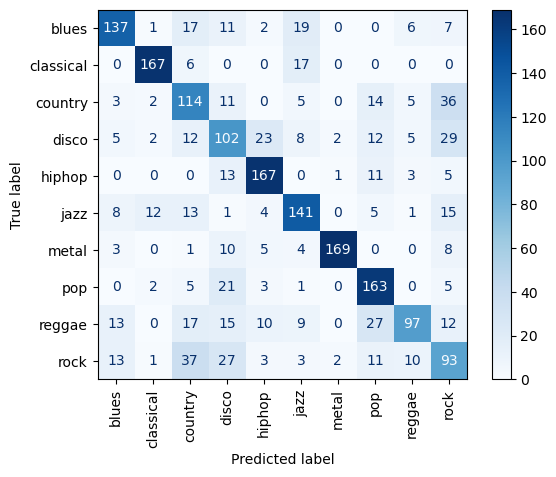

Error rate: 0.318


In [173]:
# Train a GMM for each class
gmms = {}
for cls in classes:
    X_train_cls = X_train[y_train == cls]
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X_train_cls.values)
    gmms[cls] = gmm

# Classify test instances based on the highest posterior probability
y_pred = []
for x in X_test.values:  # Convert the DataFrame to a NumPy array
    posteriors = [gmm.score_samples(x.reshape(1, -1)) for gmm in gmms.values()]
    predicted_class = classes[np.argmax(posteriors)]
    y_pred.append(predicted_class)

confusion_matrix(y_test, y_pred, classes)

error = error_rate(y_test, y_pred)
print('Error rate: {:.3f}'.format(error))